## Carregando os pacotes utilizados

In [252]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
#suppress warnings
import warnings
warnings.filterwarnings("ignore")


## Carregando e explorando as bases de dados

In [253]:
# Carregar os arquivos CSV

# para o arquivo heroes_information.csv, a coluna Unnamed: 0 foi utilizada como indice e identifiquei que o valor '-' é um valor nulo
heroes_information = pd.read_csv('heroes_information.csv',index_col='Unnamed: 0',na_values='-')

super_hero_powers = pd.read_csv('super_hero_powers.csv')

Os dados estão divididos em dois conjuntos principais:

1- heroes_information.csv: Contém informações demográficas e características básicas dos super-heróis, como nome, gênero, cor dos olhos, raça, altura, alinhamento (bom, mau, etc.), entre outras.

2 -super_hero_powers.csv: Lista os poderes dos super-heróis, com cada coluna representando um poder específico (presença ou ausência).

In [254]:
# Exibir as primeiras linhas de cada dataset para revisão
heroes_information.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,NaN,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,NaN,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,NaN,bad,-99.0


In [255]:
# Exibir as primeiras linhas de cada dataset para revisão
super_hero_powers.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [256]:
# Exibir as primeiras informações de cada dataset para revisão
heroes_information.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 0 to 733
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        734 non-null    object 
 1   Gender      705 non-null    object 
 2   Eye color   562 non-null    object 
 3   Race        430 non-null    object 
 4   Hair color  562 non-null    object 
 5   Height      734 non-null    float64
 6   Publisher   719 non-null    object 
 7   Skin color  72 non-null     object 
 8   Alignment   727 non-null    object 
 9   Weight      732 non-null    float64
dtypes: float64(2), object(8)
memory usage: 63.1+ KB


In [257]:
# Exibir as primeiras informações de cada dataset para revisão
super_hero_powers.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 168 columns):
 #    Column                        Non-Null Count  Dtype 
---   ------                        --------------  ----- 
 0    hero_names                    667 non-null    object
 1    Agility                       667 non-null    bool  
 2    Accelerated Healing           667 non-null    bool  
 3    Lantern Power Ring            667 non-null    bool  
 4    Dimensional Awareness         667 non-null    bool  
 5    Cold Resistance               667 non-null    bool  
 6    Durability                    667 non-null    bool  
 7    Stealth                       667 non-null    bool  
 8    Energy Absorption             667 non-null    bool  
 9    Flight                        667 non-null    bool  
 10   Danger Sense                  667 non-null    bool  
 11   Underwater breathing          667 non-null    bool  
 12   Marksmanship                  667 non-null    bool  
 13   Wea

In [258]:
# confirmando a quantidade de valores nulos
super_hero_powers.isnull().sum().sort_values(ascending=False)

hero_names         0
Power Cosmic       0
Enhanced Smell     0
Illusions          0
Thirstokinesis     0
                  ..
Projection         0
Summoning          0
Enhanced Memory    0
Reflexes           0
Omniscient         0
Length: 168, dtype: int64

<Axes: >

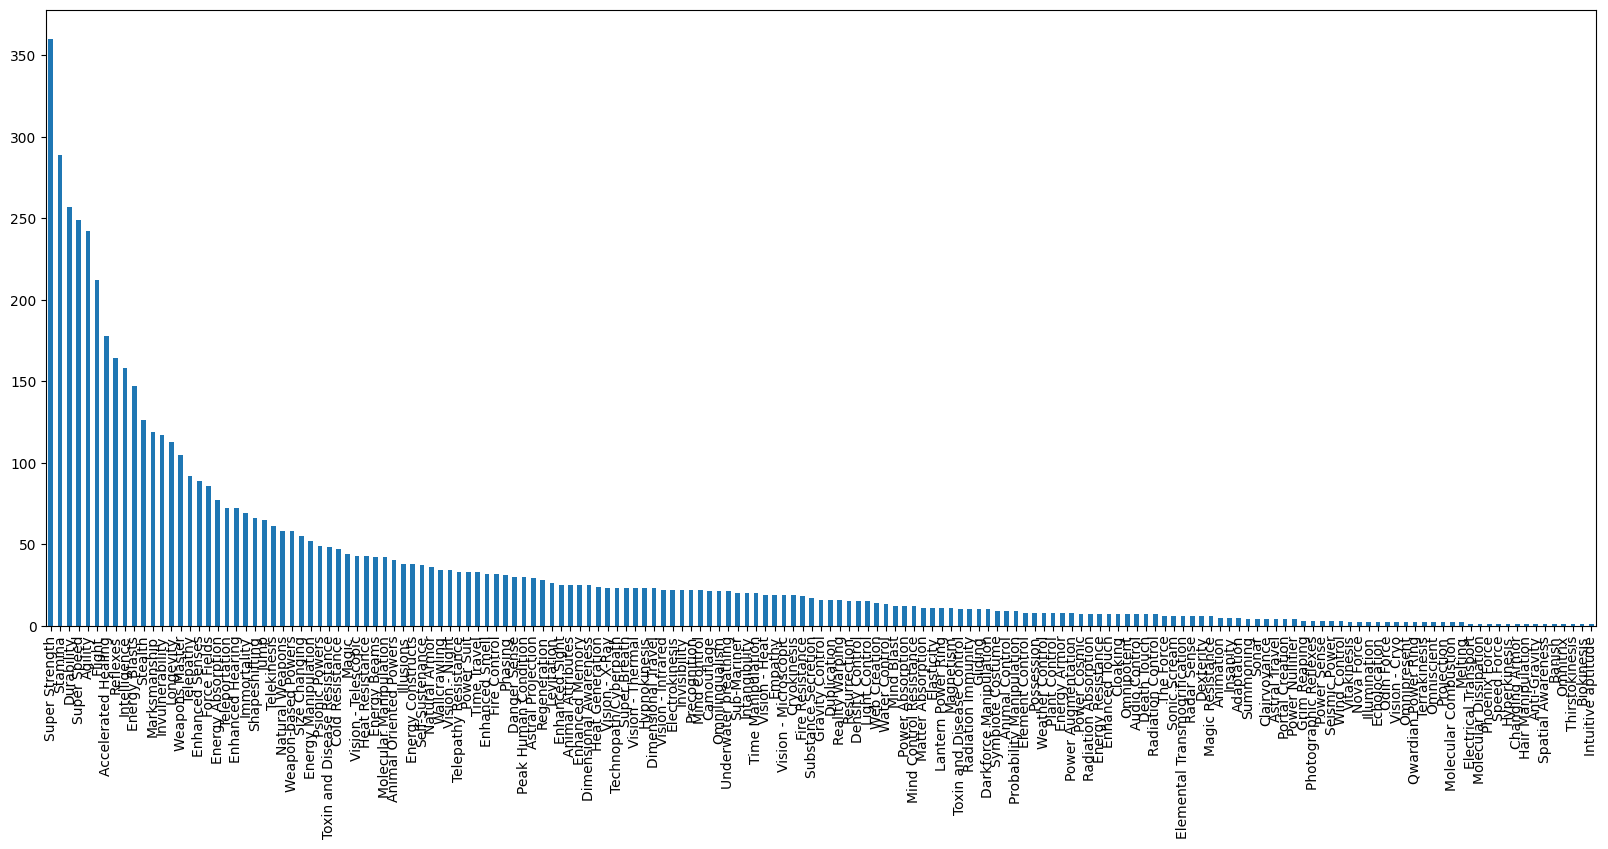

In [259]:
# plota a frequencia de cada poder
super_hero_powers.drop(columns='hero_names').sum().sort_values(ascending=False).plot(kind='bar',figsize=(20,8))

In [260]:
# filtra os poderes que aparecem com uma frequencia maior que 10%
power_freq = super_hero_powers.mean()
power_freq_index = power_freq[power_freq > 0.1].index

In [261]:
# Filtra o dataset original para ficar apenas com os poderes que aparecem em pelo menos 10% dos heróis

filtered_super_hero_powers = super_hero_powers[power_freq_index]
filtered_super_hero_powers = pd.concat([super_hero_powers['hero_names'],filtered_super_hero_powers],axis=1)
filtered_super_hero_powers.head()

,hero_names,Agility,Accelerated Healing,Durability,Stealth,Energy Absorption,Flight,Marksmanship,Weapons Master,Longevity,...,Energy Blasts,Stamina,Super Speed,Teleportation,Enhanced Senses,Immortality,Reflexes,Invulnerability,Force Fields,Enhanced Hearing
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
1,A-Bomb,False,True,True,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,True,False,False,False,True,True,True,...,False,True,False,False,False,True,True,False,False,False
3,Abin Sur,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,True,False,False


## Clusterização

1- Optei por utilizar nessa segmentação apenas o conjunto de dados de poderes filtrados acima. Primeiramente pois do ponto de vista de "negocio" me pareceu mais interessante segmentar por estes atributos. E segundo, utilizar o conjunto reduzido de atributos facilitará a compreensão e visualização dos clusters resultantes.

2- Vou utilizar o algoritmo K-Means devido à sua eficiência e pela facilidade em interpretar os clusters formados. Bem como pela visão de determinar o numero de clusters com base em uma análise de cotovelo (elbow method).

3- Verificar e tratar valores ausentes ou inválidos, que neste caso, conforme mostrado anteriormente, não foi encontrado.

4- Não houve necessidade também de codificar variáveis categóricas. (como por exemplo, o alinhamento, caso quisessemos incluir).

5 - Escalar os dados, para garantir que todos os recursos contribuam de forma equilibrada ao clustering.

6- Utilização da "Curva do Cotovelo" para apoiar a decisão do numero de clusters.

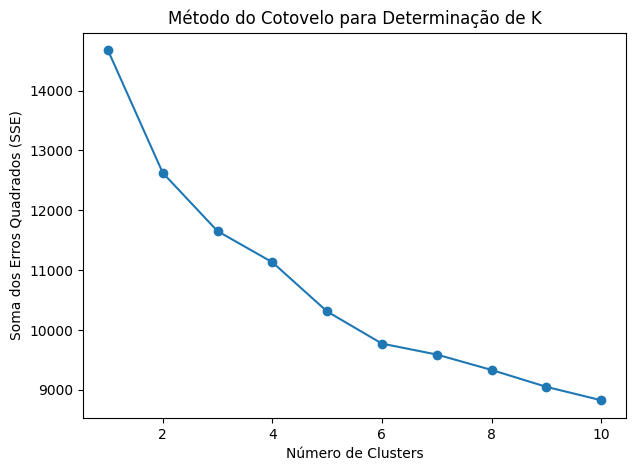

In [262]:
# Preparar os dados de poderes para clustering
powers = filtered_super_hero_powers.drop(columns=['hero_names'])

# Tratamento de valores ausentes - preencher com False (ausência de poder)
#powers = powers.fillna(False)

# Normalizar os dados de poderes
scaler = StandardScaler()
powers_scaled = scaler.fit_transform(powers)

# Determinar o número ótimo de clusters usando o método do cotovelo
sse = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(powers_scaled)
    sse.append(kmeans.inertia_)

# Plotar o gráfico do método do cotovelo
plt.figure(figsize=(7, 5))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Soma dos Erros Quadrados (SSE)')
plt.title('Método do Cotovelo para Determinação de K')
plt.show()


O gráfico do método do cotovelo sugere que o ponto de inflexão, onde a diminuição do erro quadrado soma (SSE) começa a se estabilizar, pode ser um bom indicativo para o número apropriado de clusters.

In [263]:
# Aplicar K-Means com 6 clusters

kmeans = KMeans(n_clusters=6, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(powers_scaled)

In [264]:
# Adicionar os clusters ao dataset de poderes

filtered_super_hero_powers['clusters'] = clusters
filtered_super_hero_powers.head()

,hero_names,Agility,Accelerated Healing,Durability,Stealth,Energy Absorption,Flight,Marksmanship,Weapons Master,Longevity,...,Stamina,Super Speed,Teleportation,Enhanced Senses,Immortality,Reflexes,Invulnerability,Force Fields,Enhanced Hearing,clusters
0,3-D Man,True,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,5
1,A-Bomb,False,True,True,False,False,False,False,False,True,...,True,False,False,False,False,False,False,False,False,5
2,Abe Sapien,True,True,True,False,False,False,True,True,True,...,True,False,False,False,True,True,False,False,False,4
3,Abin Sur,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
4,Abomination,False,True,False,False,False,False,False,False,False,...,True,True,False,False,False,False,True,False,False,5


In [265]:
# criando um dataframe com os centroides , sendo neste caso a média de cada cluster, isto corresponde a frequencia de cada poder.

centroids = filtered_super_hero_powers.groupby('clusters').mean()
centroids

,Agility,Accelerated Healing,Durability,Stealth,Energy Absorption,Flight,Marksmanship,Weapons Master,Longevity,Intelligence,...,Energy Blasts,Stamina,Super Speed,Teleportation,Enhanced Senses,Immortality,Reflexes,Invulnerability,Force Fields,Enhanced Hearing
clusters,,,,,,,,,,,,,,,,,,,,,
0,0.071429,0.075188,0.139098,0.041353,0.015038,0.203008,0.067669,0.048872,0.056391,0.157895,...,0.093985,0.048872,0.060150,0.093985,0.026316,0.041353,0.018797,0.022556,0.041353,0.015038
1,0.558824,0.705882,0.382353,0.235294,0.352941,0.882353,0.264706,0.088235,0.470588,0.676471,...,0.764706,0.617647,0.823529,0.882353,0.088235,0.647059,0.264706,0.764706,0.705882,0.176471
2,0.666667,0.736842,0.719298,0.368421,0.280702,0.508772,0.228070,0.298246,0.684211,0.438596,...,0.228070,0.929825,0.824561,0.052632,0.719298,0.175439,0.508772,0.526316,0.105263,0.789474
3,0.316456,0.177215,0.430380,0.037975,0.544304,0.734177,0.164557,0.088608,0.101266,0.189873,...,0.772152,0.291139,0.405063,0.025316,0.063291,0.075949,0.101266,0.240506,0.506329,0.063291
4,0.811594,0.231884,0.246377,0.913043,0.000000,0.043478,0.826087,0.913043,0.188406,0.521739,...,0.057971,0.826087,0.159420,0.057971,0.086957,0.057971,0.521739,0.000000,0.043478,0.072464
5,0.524691,0.382716,0.709877,0.123457,0.012346,0.234568,0.055556,0.012346,0.135802,0.104938,...,0.111111,0.753086,0.709877,0.049383,0.166667,0.098765,0.475309,0.222222,0.012346,0.043210


In [266]:
# Normalizando os centroides, para que possam ser comparados. Neste caso coloquei os valores entre 0 e 1.

scaler = MinMaxScaler()
normalized_centroids = scaler.fit_transform(centroids)
normalized_centroids = pd.DataFrame(normalized_centroids, columns=centroids.columns)
normalized_centroids

,Agility,Accelerated Healing,Durability,Stealth,Energy Absorption,Flight,Marksmanship,Weapons Master,Longevity,Intelligence,...,Energy Blasts,Stamina,Super Speed,Teleportation,Enhanced Senses,Immortality,Reflexes,Invulnerability,Force Fields,Enhanced Hearing
0,0.000000,0.000000,0.000000,0.003861,0.027627,0.190171,0.015721,0.040554,0.000000,0.092657,...,0.050427,0.000000,0.000000,0.080123,0.000000,0.000000,0.000000,0.029497,0.041826,0.000000
1,0.658494,0.953209,0.419261,0.225490,0.648427,1.000000,0.271436,0.084256,0.659739,1.000000,...,0.989574,0.645636,0.998650,1.000000,0.089352,1.000000,0.488941,1.000000,1.000000,0.208452
2,0.804196,1.000000,1.000000,0.377623,0.515708,0.554664,0.223890,0.317420,1.000000,0.583796,...,0.238174,1.000000,1.000000,0.031872,1.000000,0.221370,0.974217,0.688259,0.133976,1.000000
3,0.331044,0.154200,0.502037,0.000000,1.000000,0.823364,0.141463,0.084670,0.071477,0.148610,...,1.000000,0.275006,0.451214,0.000000,0.053357,0.057117,0.163973,0.314508,0.712267,0.062308
4,1.000000,0.236825,0.184900,1.000000,0.000000,0.000000,1.000000,1.000000,0.210275,0.729269,...,0.000000,0.882244,0.129865,0.038102,0.087507,0.027435,1.000000,0.000000,0.044890,0.074152
5,0.612380,0.464787,0.983761,0.097686,0.022682,0.227793,0.000000,0.000000,0.126488,0.000000,...,0.074407,0.799378,0.849970,0.028081,0.202532,0.094785,0.907682,0.290598,0.000000,0.036378


1- Para visualização optei por um grafico em radar (também chamado de spyder) para uma comparaçao entre os clusters.

2- Lembrando que o valor nos eixos estão normalizados entre 0 e 1, e desta forma são valores relatiovos de magnitude.

3- Primeiramente gero um grafico com todos os cluster junto (para um conunto grande de clusters, a visualização simultanea começa a piorar). Depois, filtrando por algum cluster escolhido (que será utilizado no streamlit)

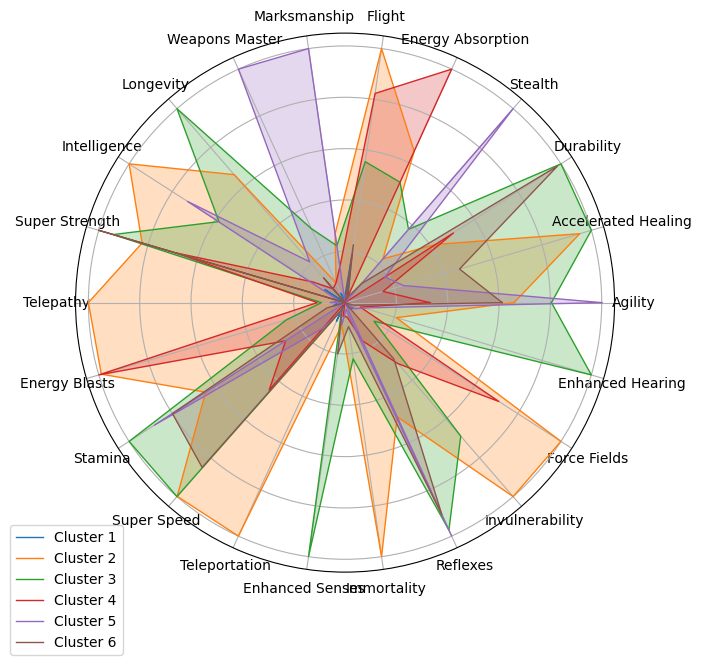

In [267]:
# Criando um radar plot para visualizar os clusters

# Definir os nomes das variáveis
labels = normalized_centroids.columns
num_vars = len(labels)

# Calcular os ângulos das variáveis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))

for i, row in normalized_centroids.iterrows():
    values = row.values.flatten().tolist()
    values += values[:1]  # Complete the loop
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Cluster {i+1}')
    ax.fill(angles, values, alpha=0.25)

# Configura os eixos
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=10)

# Adiciona um título
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()


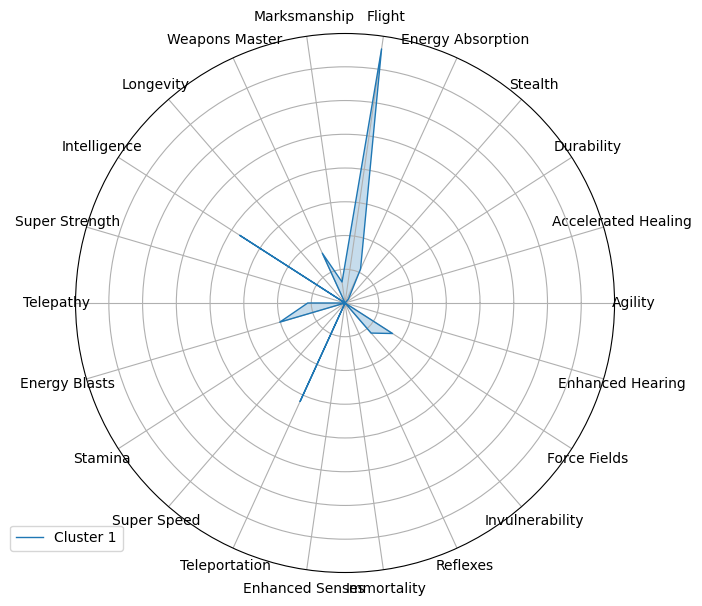

In [268]:
import numpy as np

import matplotlib.pyplot as plt

# Definir os nomes das variáveis
labels = normalized_centroids.columns
num_vars = len(labels)

# Calcular os ângulos das variáveis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

fig, ax = plt.subplots(figsize=(7,7), subplot_kw=dict(polar=True))

# Filtra os clusters que deseja plotar
clusters_to_plot = [0]  

for i, row in normalized_centroids.iterrows():
    if i in clusters_to_plot:
        values = row.values.flatten().tolist()
        values += values[:1]  # Complete the loop
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Cluster {i+1}')
        ax.fill(angles, values, alpha=0.25)

# Desenha o eixo
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=10)

# Adiciona um título
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()

Uma das maneiras de analisarmos a qualidade da clusterização é através da visualização grafica. Desta forma plotamos um grafico de disperção (scatter) , separando os clusters por cores. Para que possamos fazer esse grafico, aplicamos uma redução de dimensionalidade nos dados. Neste caso, utilizei o PCA.

Quanto mais juntos/coesos estiverem os elementos de uma mesmo cluster e ao mesmo tempo, quanto mais distantes estiverem um clusters do outro, melhor será o nossa clusterização.

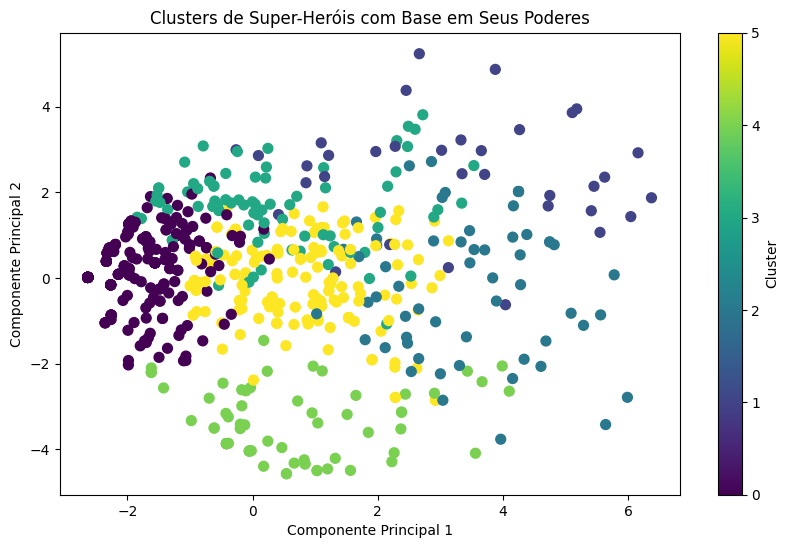

In [269]:

# Aplicar PCA para reduzir a dimensionalidade para 2 componentes principais
pca = PCA(n_components=2)
powers_pca = pca.fit_transform(powers_scaled)

# Plotar os clusters
plt.figure(figsize=(10, 6))
plt.scatter(powers_pca[:, 0], powers_pca[:, 1], c=clusters, cmap='viridis', s=50)
plt.title('Clusters de Super-Heróis com Base em Seus Poderes')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.show()


Outra forma de analisarmos e desta vez mensurar a qualidade da clusterização, é através de uma métrica chamada silhouete. 
Mede o quão semelhante cada ponto é ao seu próprio cluster em comparação com outros clusters.
O coeficiente varia de -1 a 1, onde valores mais altos indicam que os clusters são densos e bem separados. Pode-se calcular o Silhouette Score para avaliar a separação dos clusters.

In [270]:
silhouette_score(powers_scaled, clusters)

0.16114301316059673

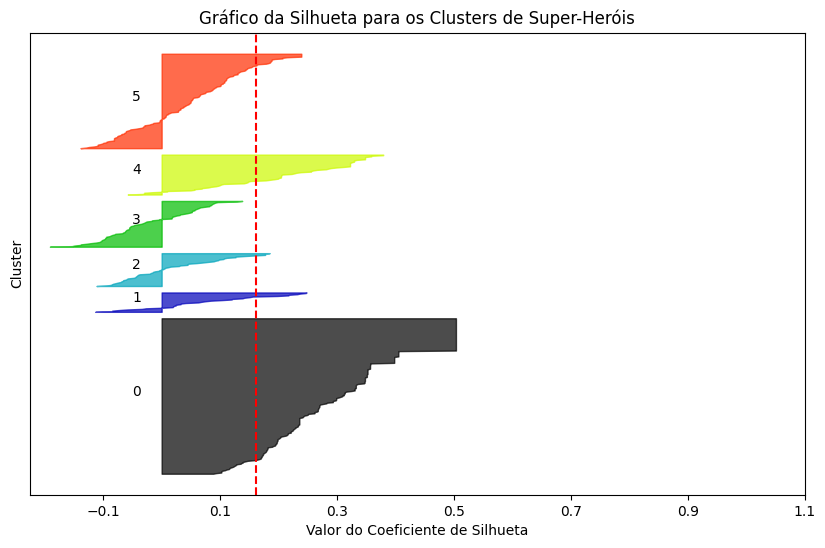

In [271]:
# Calcular a pontuação da silhueta para cada ponto
silhouette_avg = silhouette_score(powers_scaled, clusters)
sample_silhouette_values = silhouette_samples(powers_scaled, clusters)

# Criar o gráfico da silhueta
fig, ax = plt.subplots(figsize=(10, 6))

y_lower = 10
for i in range(6):
    ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = cm.nipy_spectral(float(i) / 6)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, ith_cluster_silhouette_values,
                     facecolor=color, edgecolor=color, alpha=0.7)
    
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
    y_lower = y_upper + 10

ax.set_title("Gráfico da Silhueta para os Clusters de Super-Heróis")
ax.set_xlabel("Valor do Coeficiente de Silhueta")
ax.set_ylabel("Cluster")

ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_yticks([])
ax.set_xticks(np.arange(-0.1, 1.1, 0.2))

plt.show()


Interpretação do Gráfico:
Valores de Silhueta Positivos: A maioria dos pontos possui valores de silhueta positivos, o que indica que eles estão, em média, mais próximos do próprio cluster do que de outros clusters.
Altura das Barras: A altura das barras reflete o número de pontos em cada cluster. Barras mais largas indicam clusters maiores.
Linha Vermelha Pontilhada: Esta linha representa a silhueta média. Quanto mais alta essa linha, melhor a separação dos clusters.
Valores de silhueta perto de +1 indicam que os pontos estão bem agrupados dentro do seu próprio cluster e bem separados dos outros clusters. Se houver muitos valores de silhueta negativos ou perto de zero, isso pode indicar que os pontos estão mal agrupados ou que os clusters se sobrepõem.

Conclusões / Observações

1- Alem do K-means, poderiamos avaliar ainda o DBSCAN ou Hierarchical Clustering se os dados apresentarem ruído ou uma estrutura hierárquica. Bem como o K-Modes, uma variante do proprio K-means.

2- De qualquer forma, as tecnicas não supervisionadas de clusterização requerem bastante o conhecimento especialista do problemas, para mesclar técnicas, métricas e conhecimento especialista, para encontrar a segmentaçao de melhor custo-beneficio para o problema.

## Classificação

Nesse modulo o objetivo é prever o alinhamento dos herois.

1- Partindo da premissa que era para prever uma classificaçao binaria, entre bons e maus. Filrei os dados apenas para estes alinhamentos.

2- Foi feita a transformação para numerica das classes de alinhamento.

3- Adicionei aos dados de poderes as 2 variaveis numericas dos dados demograficos. Para esse modelo base não utilizei nenhuma das categoricas.

4- Como primeiro modelo foi utilizado o Naive Bayes. Uma das hipóteses fundamentais do Naive Bayes é que as variaveis sejam independentes entre si.

5- Em seguida utilizei o modelo ensemble Random Forest.

6- E posteriormente tentei um ajuste , com balanceamento da classe alvo e busca de hiperparemetros.

In [272]:
# Preprocessamento dos dados e execução do modelo Naive Bayes

# Filtrar heróis com informações de alinhamento (bom ou mau)
heroes_info_filtered = heroes_information[heroes_information['Alignment'].isin(['good', 'bad'])]

In [273]:
heroes_info_filtered

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,NaN,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,NaN,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,NaN,bad,-99.0
...,...,...,...,...,...,...,...,...,...,...
729,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,NaN,good,52.0
730,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99.0
731,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0
732,Zatanna,Female,blue,Human,Black,170.0,DC Comics,NaN,good,57.0


In [274]:
# Codificação do alinhamento
alignment_mapping = {'good': 1, 'bad': 0}
heroes_info_filtered['Alignment'] = heroes_info_filtered['Alignment'].map(alignment_mapping)


In [275]:
# Combinar os dados de poderes com as informações filtradas dos heróis

data = heroes_info_filtered.merge(filtered_super_hero_powers, how='inner', left_on='name', right_on='hero_names')
data.dropna(subset='Weight', inplace=True)
data = data.drop(columns=['name', 'hero_names', 'Publisher', 'Race', 'Gender', 'Eye color', 'Hair color', 'Skin color','clusters'])
#data = data.drop(columns=['name', 'hero_names', 'Skin color','clusters'])
X = data.drop(columns=['Alignment'])
y = data['Alignment']

In [276]:
X

,Height,Weight,Agility,Accelerated Healing,Durability,Stealth,Energy Absorption,Flight,Marksmanship,Weapons Master,...,Energy Blasts,Stamina,Super Speed,Teleportation,Enhanced Senses,Immortality,Reflexes,Invulnerability,Force Fields,Enhanced Hearing
0,203.0,441.0,False,True,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,191.0,65.0,True,True,True,False,False,False,True,True,...,False,True,False,False,False,True,True,False,False,False
2,185.0,90.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,203.0,441.0,False,True,False,False,False,False,False,False,...,False,True,True,False,False,False,False,True,False,False
4,-99.0,-99.0,False,False,False,False,False,True,False,False,...,False,False,True,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,165.0,52.0,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
625,304.8,-99.0,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
626,66.0,17.0,True,False,False,True,False,False,True,True,...,True,True,True,False,False,False,True,False,True,False
627,170.0,57.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [277]:
# Analisando a correlação entre as variáveis e o alinhamento

data.corr().loc['Alignment'].sort_values(ascending=False)

Alignment              1.000000
Flight                 0.085721
Marksmanship           0.064727
Stealth                0.057199
Agility                0.054450
Enhanced Senses        0.039119
Force Fields           0.034541
Energy Absorption      0.027945
Height                 0.011828
Reflexes               0.011649
Stamina                0.001842
Telepathy              0.000873
Weapons Master         0.000839
Accelerated Healing    0.000762
Energy Blasts         -0.013226
Super Speed           -0.031064
Immortality           -0.041520
Longevity             -0.052556
Enhanced Hearing      -0.056584
Teleportation         -0.056897
Intelligence          -0.057925
Invulnerability       -0.071063
Durability            -0.084642
Weight                -0.102495
Super Strength        -0.150114
Name: Alignment, dtype: float64

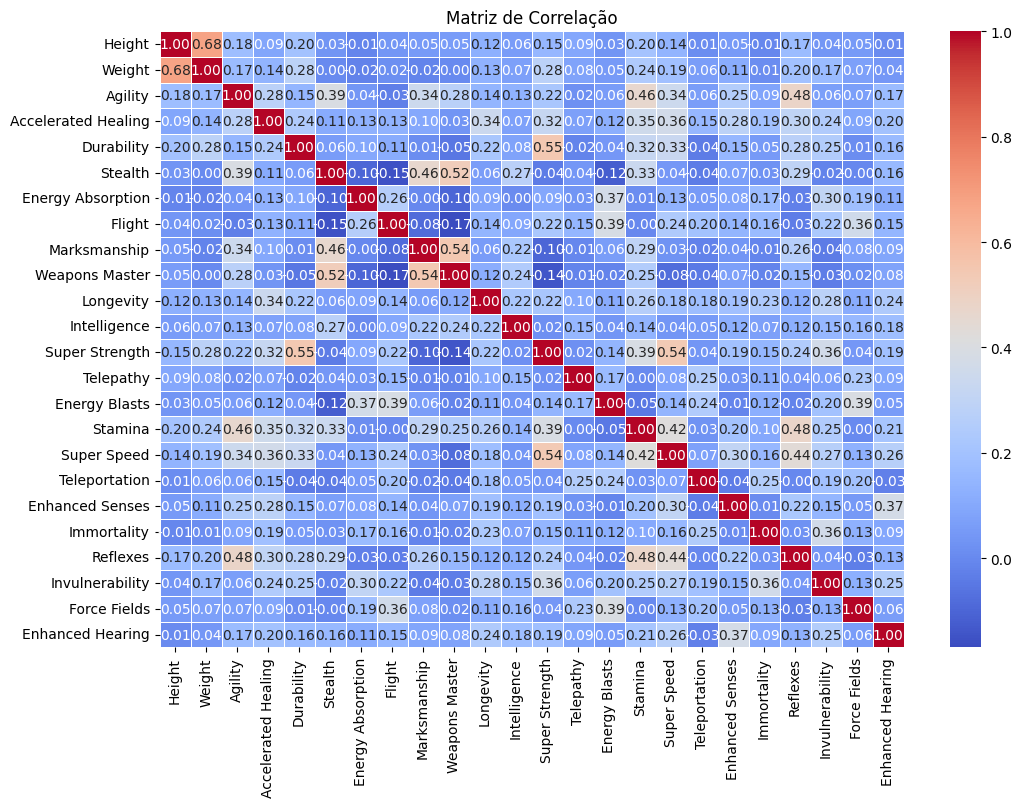

In [278]:
# Cria matriz de correlação de Pearson de todas as variáveis

corr_matrix = X.corr()

# Cria heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

In [279]:
# Modelo de Naive Bayes

#Imputar valores ausentes com a mediana
#imputer = SimpleImputer(strategy='median')
#X_imputed = imputer.fit_transform(X)

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinamento do modelo Naive Bayes
#model = GaussianNB()
model = BernoulliNB()
model.fit(X_train, y_train)

print('acuracia treino',model.score(X_train, y_train))

# Predição
y_pred = model.predict(X_test)

# Avaliação do Modelo
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Exibir resultados
print('acuracia teste:',accuracy)
print(conf_matrix)
print(classification_rep)



acuracia treino 0.7100456621004566
acuracia teste: 0.6402116402116402
[[  7  57]
 [ 11 114]]
              precision    recall  f1-score   support

           0       0.39      0.11      0.17        64
           1       0.67      0.91      0.77       125

    accuracy                           0.64       189
   macro avg       0.53      0.51      0.47       189
weighted avg       0.57      0.64      0.57       189



In [238]:
# Modelo Random Forest

# Treinamento do modelo Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=5)
rf_model.fit(X_train, y_train)

print('acuracia treino',rf_model.score(X_train, y_train))

# Predição
y_pred_rf = rf_model.predict(X_test)

# Avaliação do Modelo
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Exibir resultados
print('acuracia teste:', accuracy_rf)
print(conf_matrix_rf)
print(classification_rep_rf)

acuracia treino 0.7602739726027398
acuracia teste: 0.6666666666666666
[[  2  62]
 [  1 124]]
              precision    recall  f1-score   support

           0       0.67      0.03      0.06        64
           1       0.67      0.99      0.80       125

    accuracy                           0.67       189
   macro avg       0.67      0.51      0.43       189
weighted avg       0.67      0.67      0.55       189



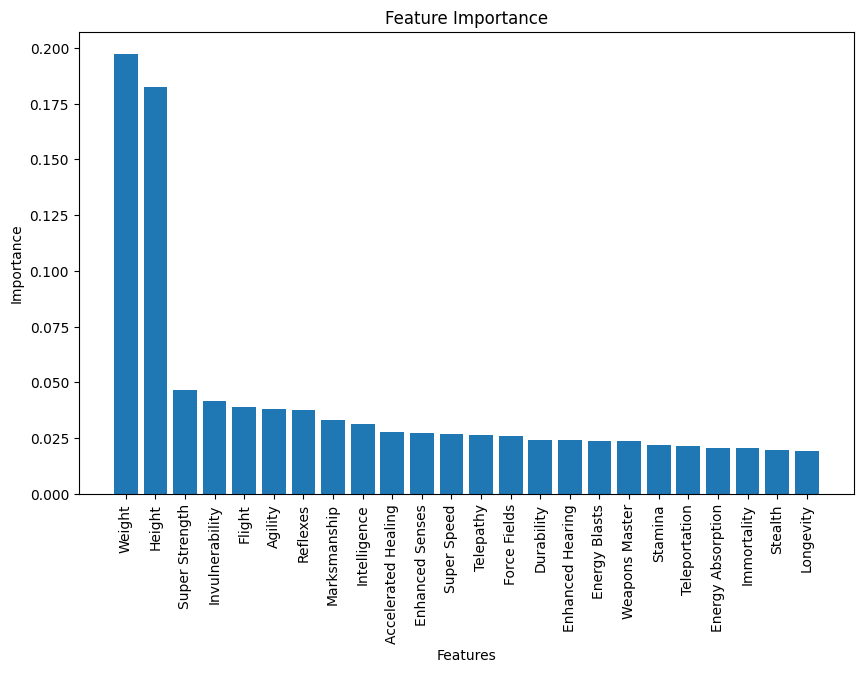

In [239]:
# Olhando a importância das features na classificação

# Importancia das features
importances = rf_model.feature_importances_

# Nome das features
feature_names = X.columns

# Ordenar os índices das features por importância
indices = np.argsort(importances)[::-1]

# Plotar a importância das features
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

1    309
0    129
Name: Alignment, dtype: int64
(438, 24)


<Axes: >

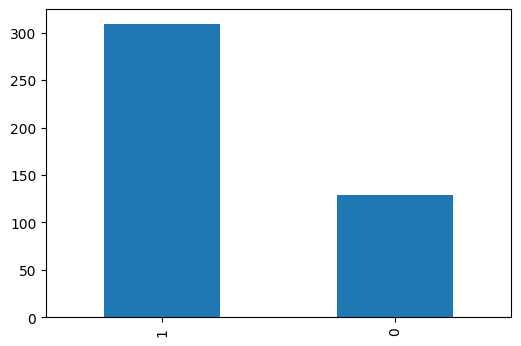

In [240]:
# Mostrando o desbalanceamento das classes

print(y_train.value_counts())
print(X_train.shape)
y_train.value_counts().plot(kind='bar',figsize=(6, 4))

In [241]:
# Balancear os dados usando SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


1    309
0    309
Name: Alignment, dtype: int64
(618, 24)


<Axes: >

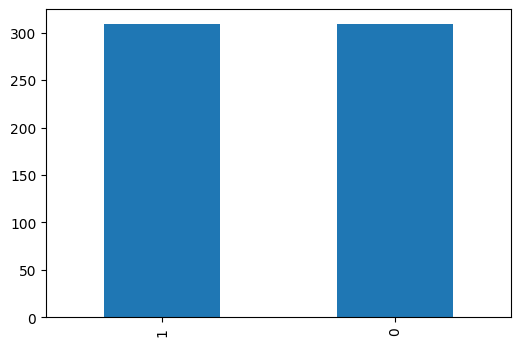

In [242]:
# Balanceamento das classes apos aplicação do SMOTE

print(y_resampled.value_counts())
print(X_resampled.shape)
y_resampled.value_counts().plot(kind='bar',figsize=(6, 4))

In [243]:
# Auste do modelo de Random Forest com GridSearchCV

# Definir a grade de hiperparâmetros para otimização
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Otimização dos hiperparâmetros com GridSearchCV
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_resampled, y_resampled)

print('acuracia media de Validacao:',grid_search.cv_results_['mean_test_score'].mean())

# Melhor modelo
best_rf_model = grid_search.best_estimator_

# Predição com o melhor modelo
y_pred_best_rf = best_rf_model.predict(X_test)

# Avaliação do Modelo
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
classification_rep_best_rf = classification_report(y_test, y_pred_best_rf)
conf_matrix_best_rf = confusion_matrix(y_test, y_pred_best_rf)

# Exibir resultados
print('acuracia de teste do melhor modelo:', accuracy_rf)
print(classification_rep_rf)
print(conf_matrix_rf)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
acuracia media de Validacao: 0.684485499574231
acuracia de teste do melhor modelo: 0.6666666666666666
              precision    recall  f1-score   support

           0       0.67      0.03      0.06        64
           1       0.67      0.99      0.80       125

    accuracy                           0.67       189
   macro avg       0.67      0.51      0.43       189
weighted avg       0.67      0.67      0.55       189

[[  2  62]
 [  1 124]]


Conclusões/Observações deste modulo:

1- Como falado e que podemos adicionar, o modelo Naive Bayes requer algumas fortes premissas, como idependencia das variaveis, equilibrio nas importancias e distribuição especificas.

2- Como utilizei apenas as variaveis binarias, a utilização do ND com distribuição de Bernoulli, melhorou bem o resultado do modelo em relação a uma Gaussiana por exemplo.

2- Ainda sim, por conta destas premissas anteriores o Random Forest, que é um modelo ensemble baseado em arvores e mais robusto, tenha funcionado um pouco melhor.

3- Alguns indicios de overfitting nos modelos, o que já foram reduzidos por CV e tuning de hiperparametros.

4- Podemos ainda testar outras variaveis nãoutilizadas, fazendo as transformações para numéricas necessarias.

5- Assim como usar tecnicas de seleção de variaveis ou utilizar o PCA aqui.

## Regressão

Nesse módulo o objetivo é prever o peso dos super herois.

1- Mantive o mesmo conjunto de dados utilizados nos módulos anteriores

2- Limpei as linhas com valores de pesos invalidos. Isto é, já havia identificados valores de -99.

3- Dado um conhecimento previo, assim como constatado nas analises, de uma relaçao não linear entre altura e peso, utilizei uma regressão não linear.

In [244]:
# Recarregar e filtrar as entradas válidas para a regressão (excluindo pesos inválidos)

valid_weight_data = heroes_information[heroes_information['Weight'] > 0]

In [245]:
valid_weight_data

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,NaN,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,NaN,bad,441.0
5,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,NaN,bad,122.0
...,...,...,...,...,...,...,...,...,...,...
728,Yellowjacket,Male,blue,Human,Blond,183.0,Marvel Comics,NaN,good,83.0
729,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,NaN,good,52.0
731,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0
732,Zatanna,Female,blue,Human,Black,170.0,DC Comics,NaN,good,57.0


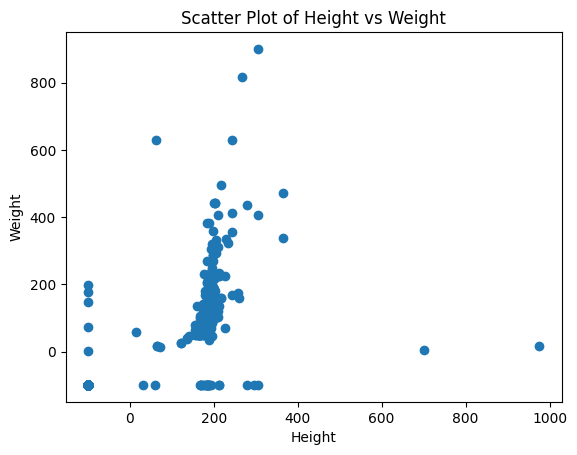

In [246]:
# Analisar a correlação, assim como a não linearidade entre altura e peso

plt.scatter(X['Height'], X['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Scatter Plot of Height vs Weight')
plt.show()

In [247]:
# Usar as características do super-herói para prever o peso

data_reg = valid_weight_data.merge(filtered_super_hero_powers, left_on='name', right_on='hero_names')
X_reg = data_reg.drop(columns=['name', 'Weight', 'hero_names', 'Publisher', 'Race', 'Gender', 'Eye color', 'Hair color', 'Skin color','clusters','Alignment'])	
y_reg = data_reg['Weight']

In [248]:
X_reg

,Height,Agility,Accelerated Healing,Durability,Stealth,Energy Absorption,Flight,Marksmanship,Weapons Master,Longevity,...,Energy Blasts,Stamina,Super Speed,Teleportation,Enhanced Senses,Immortality,Reflexes,Invulnerability,Force Fields,Enhanced Hearing
0,203.0,False,True,True,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False
1,191.0,True,True,True,False,False,False,True,True,True,...,False,True,False,False,False,True,True,False,False,False
2,185.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,203.0,False,True,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,True,False,False
4,193.0,False,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,183.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
464,165.0,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
465,66.0,True,False,False,True,False,False,True,True,True,...,True,True,True,False,False,False,True,False,True,False
466,170.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [249]:
X_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 468 entries, 0 to 467
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Height               468 non-null    float64
 1   Agility              468 non-null    bool   
 2   Accelerated Healing  468 non-null    bool   
 3   Durability           468 non-null    bool   
 4   Stealth              468 non-null    bool   
 5   Energy Absorption    468 non-null    bool   
 6   Flight               468 non-null    bool   
 7   Marksmanship         468 non-null    bool   
 8   Weapons Master       468 non-null    bool   
 9   Longevity            468 non-null    bool   
 10  Intelligence         468 non-null    bool   
 11  Super Strength       468 non-null    bool   
 12  Telepathy            468 non-null    bool   
 13  Energy Blasts        468 non-null    bool   
 14  Stamina              468 non-null    bool   
 15  Super Speed          468 non-null    boo

In [250]:
# Imputar valores ausentes com a mediana nos dados codificados
# imputer = SimpleImputer(strategy='median')
# X_reg_imputed = imputer.fit_transform(X_reg_encoded)

# Dividir os dados em treino e teste
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# Treinamento do modelo Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=3)
rf_regressor.fit(X_train_reg, y_train_reg)

print('R-squared (R2) Treino:',rf_regressor.score(X_train_reg, y_train_reg))

# Predição
y_pred_reg = rf_regressor.predict(X_test_reg)

# Avaliação do modelo
mse_rf = mean_squared_error(y_test_reg, y_pred_reg)
r2_rf = r2_score(y_test_reg, y_pred_reg)
mape = mean_absolute_percentage_error(y_test_reg, y_pred_reg)

# Resultados
print("Mean Squared Error (MSE):", mse_rf)
print("R-squared (R2):", r2_rf)
print("Mean Absolute Percentage Error (MAPE):", mape)


R-squared (R2) Treino: 0.6911093947811726
Mean Squared Error (MSE): 4804.109346675604
R-squared (R2): 0.5097205772909356
Mean Absolute Percentage Error (MAPE): 0.2635142894113882


In [251]:
rf_regressor.feature_importances_

array([8.41843696e-01, 4.77566691e-03, 2.10872954e-02, 8.23858610e-03,
       1.79172611e-03, 1.23161396e-02, 2.28629504e-03, 6.63063270e-04,
       2.31284167e-03, 4.60816687e-02, 6.97114856e-03, 5.83068177e-03,
       3.72711298e-06, 2.73083137e-03, 6.50905071e-03, 2.95335098e-03,
       3.87591026e-03, 5.19179564e-03, 6.39088103e-04, 6.27780113e-03,
       5.82091584e-03, 1.03369978e-02, 1.46172143e-03])

Conclusão/Observações deste modulo

1- Conforme mencionado no inicio, percebe-se que realmente a variavel de altura é a que tem a maior importancia para o modelo.

## Considerações Finais

Esse conjunto de dados, embora aparentemente simples e lúdico, apresenta diversos desafios para as atividades propostas:

1- Valores ausentes ou invalidos em diversas variaveis. Para isso são possíveis soluções de inputar dados, desconsiderar/filtrar dados.

2- Valores categoricos. Para os modelos precisam ser convertidos para numericos.

3- Desequilibrio nas classes. Desconsiderar , balancear os adquirir mais dados.

4- Relação não lineares entre as variaveis.

5- Alta dimensão dos dados.

6- No caso da classificação, falta aparente de efeito causal / correlaçao real, para explicar a classe alinhamento. Algum nível de correlação expuria foi encontrado.

Algumas melhorias ,algumas já mencionadas, ainda podem ser testadas, como alguns exemplos:

1- Utilizar variaveis ainda não utilizadas com seus devidos tratamentos

2- Utilizar novos algoritmos.

3- Novas engenharias de features para dimensionamento e seleçao de variaveis.